In [2]:
# obtain a default Argument object that will be used to call the compiler
import approx_gradient
import os
args = approx_gradient.get_args([])

In [3]:
# chooses from 'hl', 'tf', 'torch'
backend = 'hl'
dest_dir = '/n/fs/scratch/yutingy/celtic_knot'
# this optimization problem is more challenging, as can be seen in paper Figure 8 (b)
# so it's possible that the 5 random initialization may not converge to global optimum
# extra_runs can be set to True to run 100 random initializations instead
extra_runs = False

In [4]:
run_optimization = True
shader_suffix = ''

In [5]:
# Optimization settings
args.dir = dest_dir + shader_suffix
args.shader = 'celtic_knot' + shader_suffix
args.backend = backend
args.render_size = '640,640'
args.gt_file = 'celtic_knot.png'
if backend == 'hl':
    args.gt_transposed = True
else:
    args.gt_transposed = False
if run_optimization:
    args.modes = 'optimization'
    args.metrics = '5_scale_L2'
    args.smoothing_sigmas = '0.5,1,2,5'
    args.learning_rate = 0.01
    args.multi_scale_optimization = True
    args.alternating_times = 5
    args.tunable_param_random_var = True
    args.tunable_param_random_var_opt = True
    args.tunable_param_random_var_seperate_opt = True
    args.tunable_param_random_var_std = 1.
    args.save_all_loss = True
    args.reset_opt_each_scale = False
    args.reset_sigma = False
    if args.backend in ['tf', 'torch']:
        args.verbose = True
    else:
        args.verbose = False
    args.save_best_par = True
    if extra_runs:
        args.init_values_pool = 'apps/example_init_values/test_finite_diffring_contour_extra_init_values_pool.npy'
    else:
        args.init_values_pool = 'apps/example_init_values/test_finite_diffring_contour_init_values_pool.npy'
else:
    args.modes = 'render'
    args.init_values_pool = os.path.join(dest_dir, 'best_par.npy')

In [6]:
approx_gradient.main(args)

cd apps; python render_single.py /n/fs/scratch/yutingy/celtic_knot render_celtic_knot --backend hl --compiler_modes fw,fw_random_par,bw_random_par,producer_random_par,fw_prune_updates --use_select_rule 1 --use_multiplication_rule 1 --ndims 2 ; cd ..
loaded compiler_problem from /n/fs/scratch/yutingy/celtic_knot
initialize y pyramic, conv with sigma  0.5
initialize y pyramic, conv with sigma  1.0
initialize y pyramic, conv with sigma  2.0
initialize y pyramic, conv with sigma  5.0
reset_min set to True for newly created buffers
Instantiated buffer 0 with shape  (640, 640, 3)
reset_min set to True for newly created buffers
Instantiated buffer 0 with shape  (640, 640, 3)
Instantiated buffer 1 with shape  (640, 640, 84)
0 global -1 0.0041672643
1 global -1 0.0020574778
2 global 0 0.0060941754
3 global 0 0.015391493
4 global -1 0.0028175737
cd apps; python render_single.py /n/fs/scratch/yutingy/celtic_knot render_celtic_knot --backend glsl --compiler_modes fw --no_compute_g --par_file /n/fs

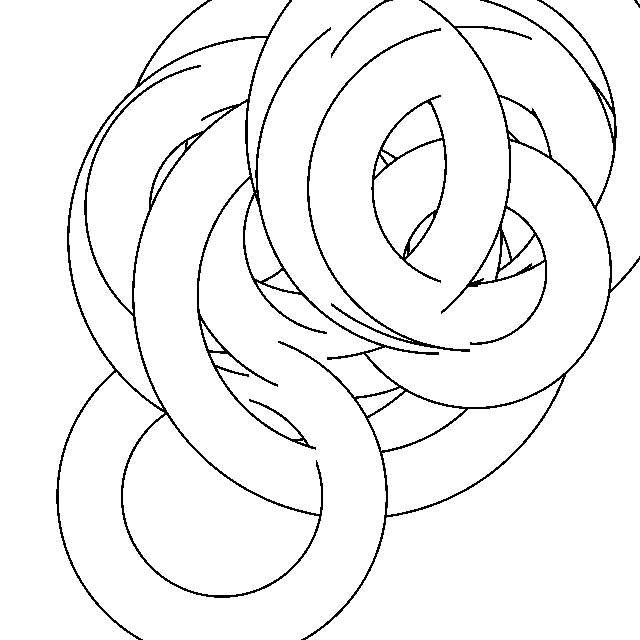

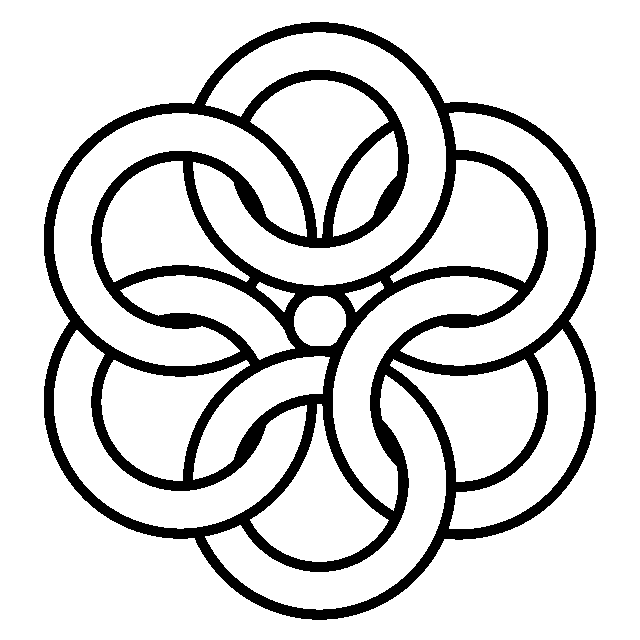

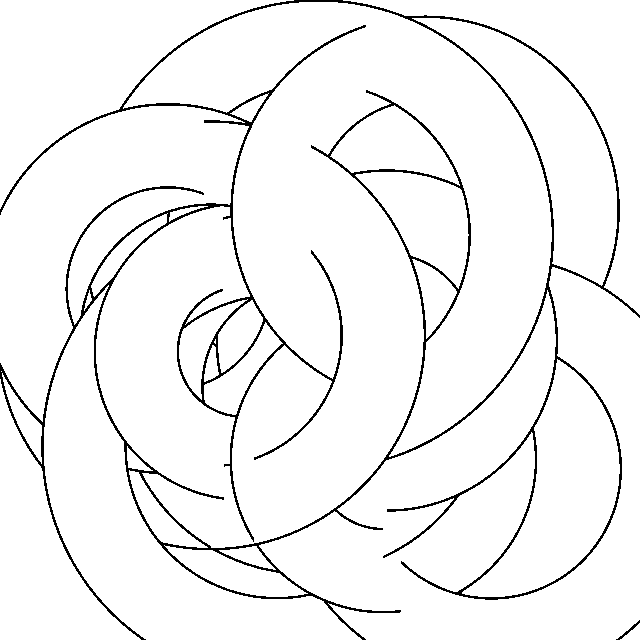

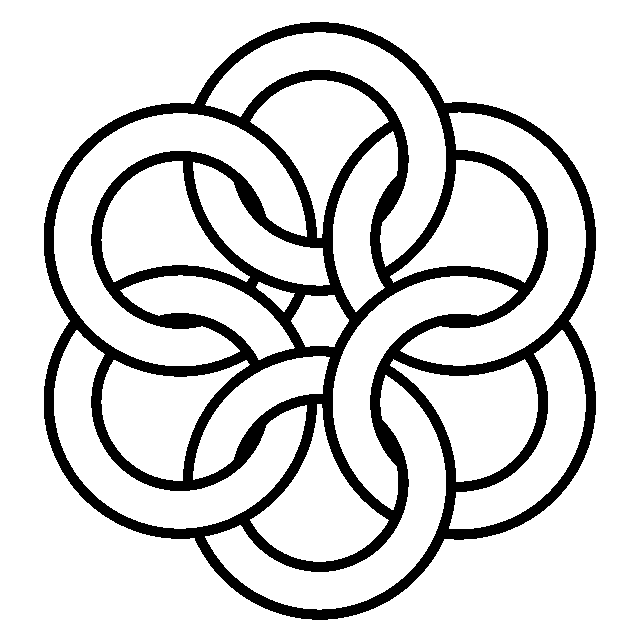

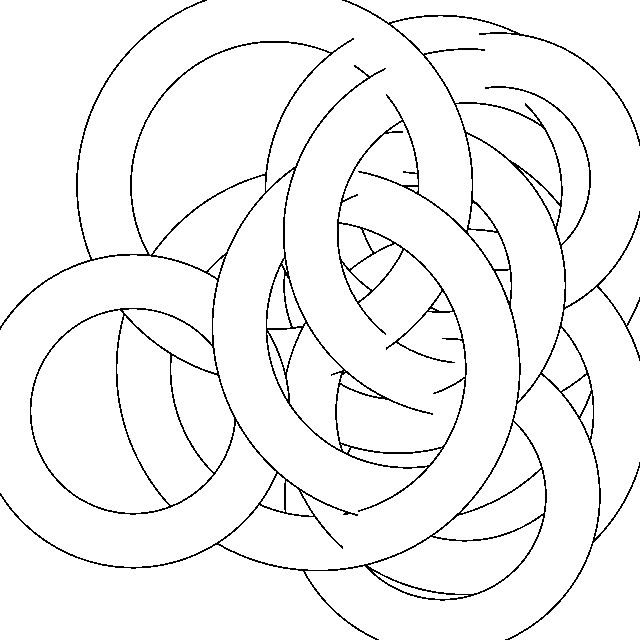

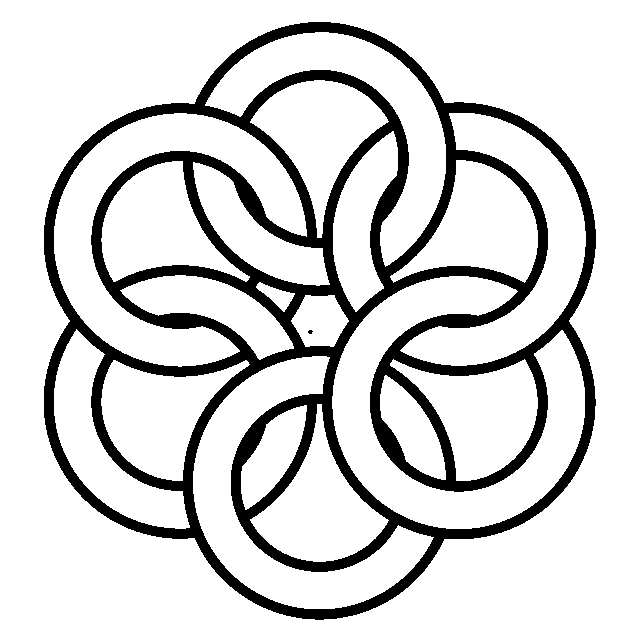

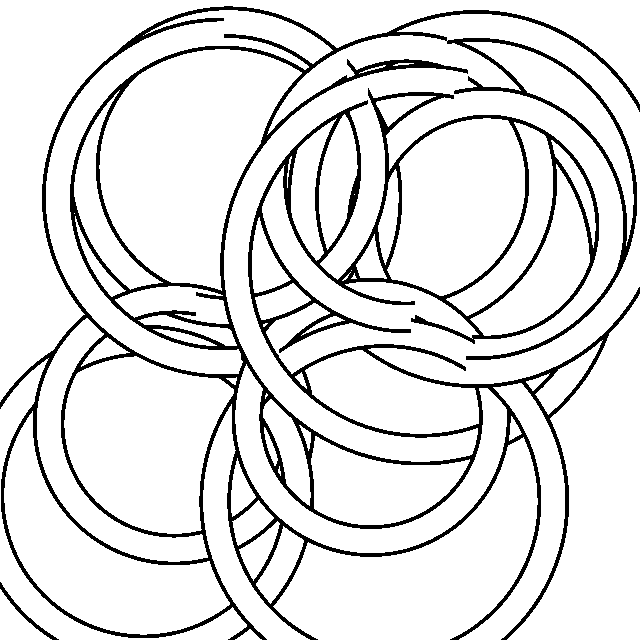

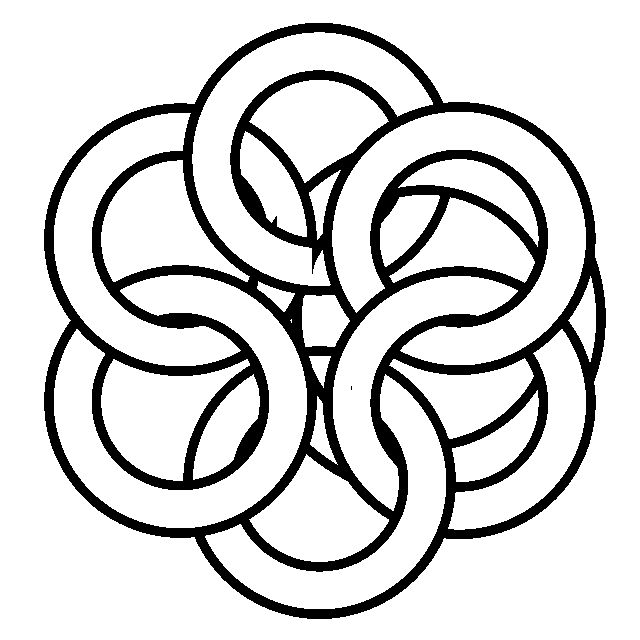

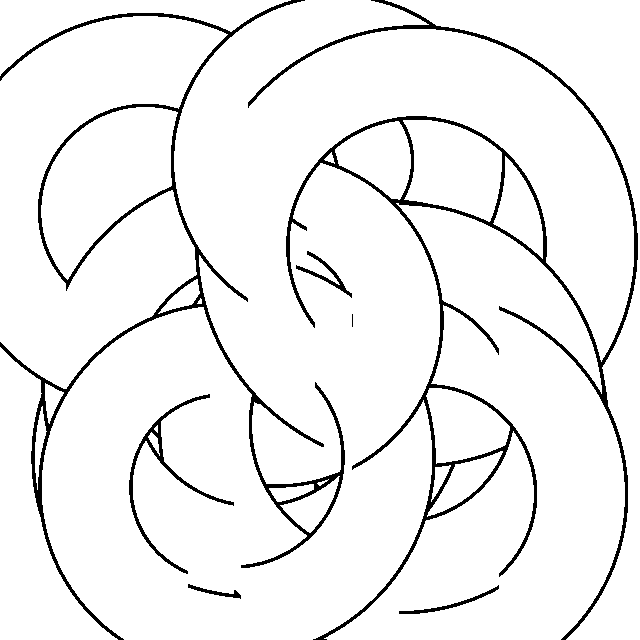

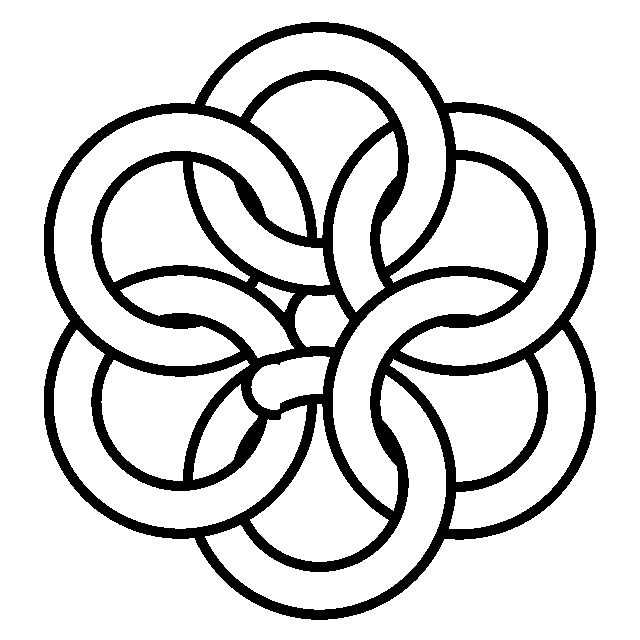

In [7]:
from IPython.display import Image, display

listOfImageNames = []

for i in range(5):
    listOfImageNames.append(os.path.join(args.dir, 'init_no_random%d.png' % i))
    listOfImageNames.append(os.path.join(args.dir, 'ours_%s_%s_%.1e_result%d_0.png' % (args.metrics,
                                                                                       args.optimizer,
                                                                                       args.learning_rate,
                                                                                       i)))

for imageName in listOfImageNames:
    display(Image(filename=imageName, width=300))